<a href="https://colab.research.google.com/github/Abeer-Rahman/Workshop-MolSSI-Python-Data-and-Scripting/blob/main/Notebook_5_Data_fitting_with_scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data fittng lesson
Fit data to any functional form

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("data_fitting.csv")

In [ ]:
print(df)

    xdata  ydata
0   -10.0    1.2
1    -9.0    4.2
2    -8.0    6.7
3    -7.0    8.3
4    -6.0   10.6
5    -5.0   11.7
6    -4.0   13.5
7    -3.0   14.5
8    -2.0   15.7
9    -1.0   16.1
10    0.0   16.6
11    1.0   16.0
12    2.0   15.4
13    3.0   14.4
14    4.0   14.2
15    5.0   12.7
16    6.0   10.3
17    7.0    8.6
18    8.0    6.1
19    9.0    3.9
20   10.0    2.1


In [ ]:
df.head()

,xdata,ydata
0,-10.0,1.2
1,-9.0,4.2
2,-8.0,6.7
3,-7.0,8.3
4,-6.0,10.6


In [ ]:
xdata=df['xdata'].values  #Will only print values
ydata=df['ydata'].values
print(xdata)
print(ydata)
print(type(xdata))

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
[ 1.2  4.2  6.7  8.3 10.6 11.7 13.5 14.5 15.7 16.1 16.6 16.  15.4 14.4
 14.2 12.7 10.3  8.6  6.1  3.9  2.1]
<class 'numpy.ndarray'>


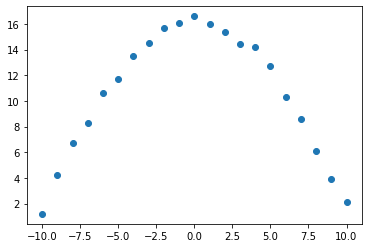

In [ ]:
 plt.plot(xdata,ydata,'o')

This data could probably be fit to many functional forms. Two functional form that fit this data are Guassian function and cosine functtion.

1. Guassian function $ y=Ae^{-Bx^2} $

2. Cosine Function $ y=Dcos(Ex) $

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def Gauss(x,A,B):
    y=A*np.exp(-1*B*x**2)
    return y


In [ ]:
parameters, covariance= curve_fit(Gauss,xdata,ydata)

<ipython-input-14-41a18021cbb1>:2: RuntimeWarning: overflow encountered in exp
  y=A*np.exp(-1*B*x**2)


In [ ]:
print(parameters)

[1.69342863e+01 1.57396009e-02]


In [ ]:
print(covariance)

In [ ]:
fit_A=parameters[0]
fit_B=parameters[1]
print(fit_A)
print(fit_B)

16.934286342773795
0.015739600938137456


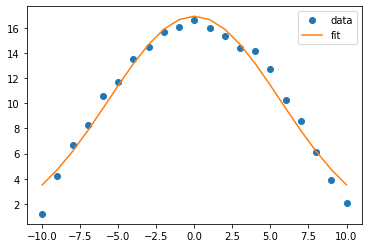

In [ ]:
fit_y=Gauss(xdata,fit_A,fit_B)
plt.plot(xdata,ydata,'o',label='data')
plt.plot(xdata,fit_y,'-',label='fit')
plt.legend()


Calculate the standard error from the covariance matrix, take the sqrt of the diagonal elements of the covariance matrix. This can be done by using function from numpy library

In [ ]:
SE=np.sqrt(np.diag(covariance))
print(SE)
print(np.diag(covariance))

[0.35658082 0.0008652 ]
[1.27149878e-01 7.48572394e-07]


In [ ]:
SE_A=SE[0]
SE_B=SE[1]

print(F"The value of A is {fit_A:.5f} with a standard error of {SE_A:.5f}")
print(F"The value of B is {fit_B:.5f} with a standard error of {SE_B:.5f}")

The value of A is 16.93429 with a standard error of 0.35658
The value of B is 0.01574 with a standard error of 0.00087


In [ ]:
def cos_fun(x,D,E):
    y=D*np.cos(E*x)
    return y

In [ ]:
guess=[16, 0.1] # Research in cos function
parameters,covariance=curve_fit(cos_fun,xdata,ydata,p0=guess)
print(parameters)
print(covariance)

[16.31473263  0.14649402]
[[1.23014875e-02 4.53865121e-05]
 [4.53865121e-05 8.14037334e-07]]


In [ ]:
fit_D=parameters[0]
fit_E=parameters[1]
fit_y=cos_fun(xdata,fit_D,fit_E)

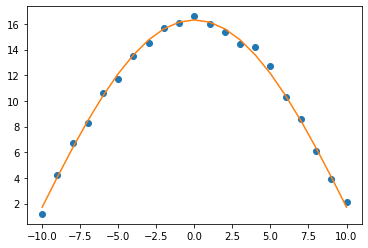

In [ ]:
plt.plot(xdata,ydata,'o',label='Data')
plt.plot(xdata,fit_y,'-',label='Cosine Fit')

In [ ]:
SE=np.sqrt(np.diag(covariance))
print(SE)

In [ ]:
SE_D=SE[0]
SE_E=SE[1]
print(F"The value of D is {fit_D} with standard error {SE_D}")
print(F"The value of E is {fit_E} with standard error {SE_E}")

The value of D is 16.31473263118848 with standard error 0.3565808159352346
The value of E is 0.1464940225344265 with standard error 0.0008652007826772984
